In [1]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram


%run DataAnalysis.ipynb

In [2]:
data = DataAnalysis()
data.load_data()

In [3]:
data.get_eventdf()

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp
entry,,,,,,,,,,
0,350259,4,201.712,1,3.175603,3.162,5.350868e+03,-2228.379725,2209.313868,6.922486e+03
1,350259,32,334.408,1,3.173095,3.164,5.333960e+03,-4604.478149,3705.018311,7.599031e+03
2,350259,23,1922.776,1,3.209816,3.208,4.736281e+03,-4649.411229,3223.717717,6.487084e+03
3,350259,6,3444.392,1,3.175244,3.161,5.341670e+03,-4218.544189,3944.732849,7.330490e+03
4,350259,29,5731.368,1,3.168502,3.158,5.415189e+03,-4729.856969,2827.517034,7.222236e+03
...,...,...,...,...,...,...,...,...,...,...
629575,350292,975,2757535.517,0,9999.999000,3.324,9.999999e+06,-5140.619446,134.950806,9.999999e+06
629576,350292,937,2757653.128,1,3.177405,3.176,5.286591e+03,-2585.631765,3640.902913,6.996134e+03
629577,350292,975,2758178.425,0,9999.999000,7.712,9.999999e+06,-5143.951182,118.415599,9.999999e+06


In [4]:
noisydata = copy.deepcopy(data)

In [5]:
data.filter_noisy()

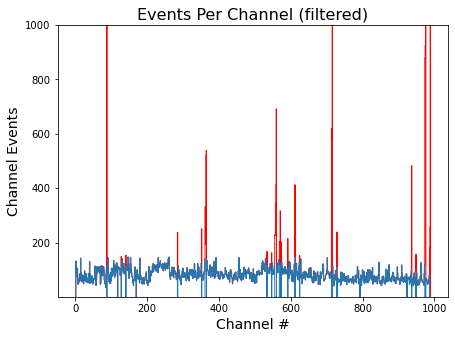

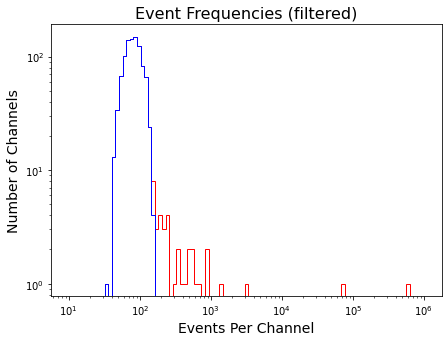

In [6]:
plt.figure(figsize=(7,5)) # lets you make a custom size for your plot
array1=plt.hist(noisydata.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array2=plt.hist(data.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")
plt.ylim(1,1000)


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.logspace(1,6,100), histtype='step', color='r')
plt.hist(array2[0], np.logspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [7]:
quietdata = copy.deepcopy(data)

In [8]:
data.filter_baseline()

In [9]:
data.get_eventdf()

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp
entry,,,,,,,,,,
6,350259,27,7191.136,1,3.175879,3.637,23567.885857,-4515.251541,14154.884720,29155.087318
7,350259,28,7191.152,1,3.200379,3.687,25765.831235,-5549.806880,15168.531703,29658.848249
98,350260,2,73672.648,1,3.165242,3.517,31308.324329,-1669.523214,11263.895009,39683.776708
99,350260,1,73672.656,1,3.164472,3.604,26767.777221,-2197.285110,11831.150467,31858.203222
100,350260,17,73672.664,1,3.359793,3.754,31408.606063,-3511.258682,13117.887100,153361.492091
...,...,...,...,...,...,...,...,...,...,...
619028,350289,978,2584045.664,1,3.179416,3.653,27506.358221,-5280.665339,14912.287654,33499.804503
625959,350290,946,2620035.936,1,3.146274,3.127,33340.302933,-3856.221700,13447.789693,39082.955824
625964,350290,947,2620035.984,1,3.242658,3.206,26844.811556,-3487.122375,13077.729065,33053.434909


In [ ]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Events vs Baseline+MaxToBaseline", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['MaxToBaseline'].values+data.get_eventdf()['Baseline'].values, np.linspace(0,9800,9801), histtype='step')
plt.gca().set_yscale("log")

plt.savefig('plots/pdf/Baseline_MaxToBaseline.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Baseline_MaxToBaseline.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Selected Energy", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
#plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
#array=plt.hist(quietdata.get_eventdf()['SelectedEnergy'].values, np.linspace(0,40000,200), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['SelectedEnergy'].values, np.linspace(0,40000,200), histtype='step')


plt.gca().set_yscale("log")



In [ ]:
event_threshold = 5
time_threshold = 1

data.arrange_clusters(event_threshold, time_threshold)
data.make_clusterdf()

In [ ]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Selected Energy", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
#plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(quietdata.get_eventdf()['SelectedEnergy'].values, np.linspace(0,40000,200), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['SelectedEnergy'].values, np.linspace(0,40000,200), histtype='step')


plt.gca().set_yscale("log")



In [ ]:
data.get_eventdf()

In [ ]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Selected Energy", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
#plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['SelectedEnergy'].values, np.linspace(0,40000,200), histtype='step')
plt.gca().set_yscale("log")



In [ ]:
messydata = copy.deepcopy(data)

In [ ]:
messydata.get_clusterdf()

In [ ]:
print("Messy cluster rate: " + str(messydata.get_clusterrate()))
data.filter_clusterdf(2.5, 5) #(NRMSE, channels)
print("Filtered cluster rate: " + str(data.get_clusterrate()))

In [ ]:
data.get_clusterdf()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(data.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(data.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step')


plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(8,5))
array = plt.hist(messydata.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step', color='r')
array = plt.hist(data.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step')
plt.title("Time Spread Frequency", fontsize=16)
plt.xlabel("Time Spread (s)", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks

#plt.ylim(0,50)

#plt.savefig('plots/pdf/Pre_TimeSpread.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_TimeSpread.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Time Spread Frequency (filtered)", fontsize=16)
#plt.xlabel("Time Spread (s)", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.ylim(0,50)

plt.savefig('plots/pdf/TimeSpread.pdf',bbox_inches = "tight")
plt.savefig('plots/png/TimeSpread.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(messydata.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step', color='r')
array=plt.hist(data.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step')

#line = plt.axvline(1)

plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure()
plt.title("Extra Channels (unfiltered)", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

array = plt.hist(messydata.get_clusterdf()['ExtraCh'], np.linspace(0,80,81), color='r', histtype='step')
plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

array = plt.hist(data.get_clusterdf()['ExtraCh'], np.linspace(0,80,81), histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure()
plt.title("Missing Channels", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
array = plt.hist(messydata.get_clusterdf()['MissingCh'], np.linspace(0,12,13), color='r')

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)
array = plt.hist(data.get_clusterdf()['MissingCh'], np.linspace(0,12,13))

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


In [ ]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(data.get_clusterdf()['Zenith'], np.linspace(0,1.01,20), histtype='step')

plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], np.linspace(0,1.01,40), histtype='step')

plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(data.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,90), histtype='step')

plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth vs Zenith Angles", fontsize=18)
plt.ylabel('Azimuth (rad)',fontsize=16)
plt.xlabel('Zenith (rad)',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Zenith'], data.get_clusterdf()['Azimuth'])

plt.savefig('plots/pdf/Azimuth_vs_Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth_vs_Zenith.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Clusters Over Time", fontsize=18)
plt.ylabel('Clusters',fontsize=16)
plt.xlabel('Start Time',fontsize=16)
array=plt.hist(data.get_clusterdf()['StartTime'], np.linspace(0,2760000,30), histtype='step')
#plt.gca().set_yscale("log")

plt.savefig('plots/pdf/ClusterTimes.pdf',bbox_inches = "tight")
plt.savefig('plots/png/ClusterTimes.png',dpi=300,bbox_inches = "tight")

In [ ]:
data.get_clusterdf().loc[(data.get_clusterdf()['Channels'] >= 10) & (data.get_clusterdf()['MissingCh'] <= 3)]

In [ ]:
data.show_cluster(164)

In [ ]:
data.show_simulation(164)

In [ ]:
data.show_cluster([2,6,9])

In [ ]:
data.show_cluster(0)